# Exercises

## Overview

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- **Has the network latency gone up since we switched internet service providers?**

$H_{0}$: There is no difference in network latency with old and new ISP.

$H_{a}$: Network latency with new ISP is higher than network latency with previous ISP.
______________________________________
True Positive: Test shows network latency is higher with new ISP than with old.

True Negative: Test shows network latency is the same with new ISP and old ISP.
______________________________________

Type I Error: Test shows network latency is higher with new ISP than with old but latency is actually the same.

Type II Error: Test shows network latency is the same but latency is higher with new ISP.


- **Is the website redesign any good?**

$H_{0}$: There is no difference between new and old website design.

$H_{a}$: The new website design is better than the old design.
______________________________________
True Positive: Test shows the new design is better and the new design is actually better

True Negative: Test shows both design are the same and the both designs are actually the same.
______________________________________

Type I Error: Test shows new design is better but both designs are the actually same.

Type II Error: Test shows both design are the same but the new design is actually better.

- **Is our television ad driving more sales?**

$H_{0}$: There is no difference in sales before and after television ad.

$H_{a}$: Sales are higher with television ad than without.
______________________________________
True Positive: Test shows sales increased after TV ad and sales actually increased after the ad aired.

True Negative: Test shows sales remained the same before and after the ad aired and sales actually remained the same.
______________________________________

Type I Error: Test shows sales increased after the ad but sales actually remained the same.

Type II Error: Test shows sales reamined the same but sales actually increased after the ad aired.

## T-Test

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

| |Office 1:|Office 2:|
|-|--------|----------|
Sample size|40 sales|50 sales|
Mean|90 days|100 days|
Std Dev|15 days|20 days

In [2]:
office1 = 90
std1 = 15
n1 = 40

In [3]:
office2 = 100
std2 = 20
n2 = 50

**Establish Hypothesis**

$H_{0}$: Mean time to sell homes for Office 1 = mean time to sell homes for Office 2

$H_{a}$: Mean time to sell homes for Office 1 != mean time to sell homes for Office 2

**Significance Level**

In [4]:
alpha = 0.05

**Verify Assumptions**

- Each sample has more than 30 obs!! It is Normal-ish
- The performance for each office is independent of the other
- The variances are not equal

In [5]:
office_1_var=std1**2
print(office_1_var)
office_2_var=std2**2
print(office_2_var)

225
400


**Compute the Statistic**

In [6]:
t, p = stats.ttest_ind((office1, std1, n1), (office2, std2, n2), equal_var=False)
t, p

(-0.2595870658255824, 0.8080344163167442)

**Decide**

In [275]:
print("is p/2 < alpha? ", p < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  False
is t > 0?  True


In [276]:
if p > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


### Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [277]:
from pydataset import data
df = data('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [278]:
avg_mpg = (df.cty + df.hwy)/2
df["avg_mpg"] = avg_mpg

In [279]:
mpg_1999 = df[df.year == 1999].avg_mpg
mpg_1999.shape

(117,)

In [280]:
mpg_2008 = df[df.year == 2008].avg_mpg
mpg_2008.shape

(117,)

**Plot Distributions**

<AxesSubplot:>

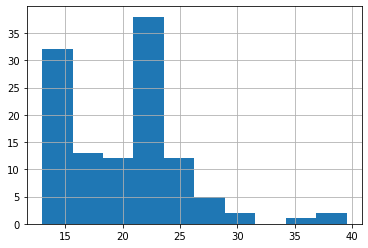

In [281]:
mpg_1999.hist()

<AxesSubplot:>

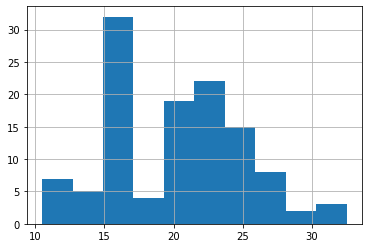

In [282]:
mpg_2008.hist()

**Hypothesis**

$H_{0}$: The mean mpg is the same among 2008 and 1999 vehicles

$H_{a}$: There is a significant difference among vehicles made in 2008 and 1999

**Significance Level**

In [283]:
alpha = .05

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [16]:
print(f'For 1999, the mean mpg is {mpg_1999.mean()} and the variance is {mpg_1999.var()}')
print(f'For 2008, the mean mpg is {mpg_2008.mean()} and the variance is {mpg_2008.var()}')

For 1999, the mean mpg is 20.22222222222222 and the variance is 27.122605363984682
For 2008, the mean mpg is 20.076923076923077 and the variance is 24.097480106100797


In [17]:
t, p = stats.ttest_ind(mpg_2008, mpg_1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

**Decide**

In [285]:
print("is p < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p < alpha?  False
is t > 0?  True


In [284]:
if p > alpha:
    print("We fail to reject $H_{0}$. The mean mpg is the same among 2008 and 1999 vehicles")
elif t < 0:
    print("We fail to reject $H_{0}$. The mean mpg is the same among 2008 and 1999 vehicles")
else:
    print("We reject $H_{0}$. There is a significant difference of mean mpg among vehicles made in 2008 and 1999")

We fail to reject $H_{0}$. The mean mpg is the same among 2008 and 1999 vehicles


- **Are compact cars more fuel-efficient than the average car?**

In [20]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [21]:
compact = df[df["class"] == "compact"].avg_mpg

In [22]:
overall = df.avg_mpg

In [23]:
overall = overall
compact = compact

In [24]:
overall

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: avg_mpg, Length: 234, dtype: float64

**Plot Distributions**

<AxesSubplot:>

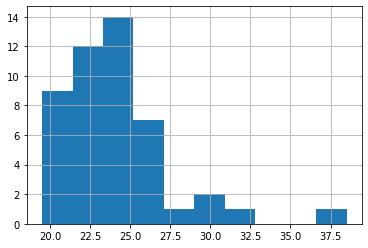

In [25]:
compact.hist()

<AxesSubplot:>

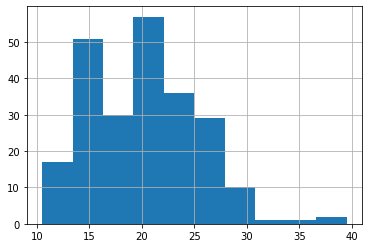

In [26]:
overall.hist()

**Hypothesis**

$H_{0}$: The mean mpg for compact cars <= the mean mpg for all vehicles

$H_{a}$: The mean mpg for compact cars > the mean mpg for all vehicles

**Significance Level**

In [27]:
alpha = 0.05

**Verify Assumptions**

- Normal: yes!
- Independent: yes!
- Variance: ?

In [28]:
print(f'For compact cars, the mean mpg is {compact.mean()} and the variance is {compact.var()}')
print(f'For non-compact cars, the mean mpg is {overall.mean()} and the variance is {overall.var()}')

For compact cars, the mean mpg is 24.21276595744681 and the variance is 12.442876965772433
For non-compact cars, the mean mpg is 20.14957264957265 and the variance is 25.50542900113715


In [29]:
overall_mean = overall.mean()

In [30]:
t, p = stats.ttest_1samp(compact, overall_mean)
t, p

(7.896888573132535, 4.1985637943171336e-10)

**Decide**

In [31]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [32]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{a}$")

We reject $H_{a}$


- **Do manual cars get better gas mileage than automatic cars?**

This is a 2 sample independent test
We will be looking at a 1-tail, looking at the right tail for a t-stat greater than 0.

To reject the null hyp, we will need p/2 < \$alpha$ and a t-stat > 0

In [33]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [34]:
manual = df.loc[df['trans'].str.contains("manual")].avg_mpg
auto = df[-df.isin(manual) == True].avg_mpg.dropna(0)

**Plot Distributions**

<AxesSubplot:>

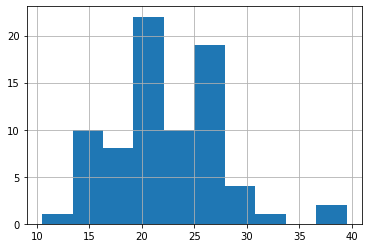

In [35]:
manual.hist()

<AxesSubplot:>

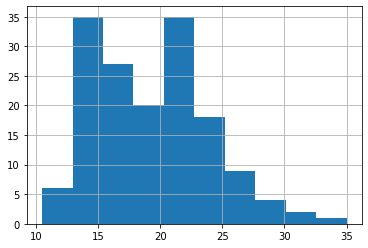

In [36]:
auto.hist()

**Hypothesis**

$H_{0}$: The mean mpg for a manual car is less than or equal to auto cars

$H_{a}$: The mean mpg for manual is greater than the mean mpg for auto.

**Significance Level**

In [37]:
alpha = 0.05

**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: ?

In [38]:
print(f'For manual cars, the mean mpg is {manual.mean()} and the variance is {manual.var()}')
print(f'For auto cars, the mean mpg is {auto.mean()} and the variance is {auto.var()}')

For manual cars, the mean mpg is 22.227272727272727 and the variance is 26.635167464114826
For auto cars, the mean mpg is 19.130573248407643 and the variance is 21.942777233382337


In [39]:
t, p = stats.ttest_ind(manual, auto, equal_var = False)
t, p

(4.443514012903071, 1.795224899991793e-05)

**Decide**

In [40]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [41]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$: The mean mpg is the same among manual and auto vehicles")
elif t < 0:
    print("We fail to reject $H_{0}$: The mean mpg is the same among manual and auto vehicles")
else:
    print("We reject $H_{a}$: There is a significant difference of mpg between manual vehicles and auto vehicles")

We reject $H_{a}$: There is a significant difference of mpg between manual vehicles and auto vehicles


In [42]:
manual.mean()

22.227272727272727

In [43]:
auto.mean()

19.130573248407643

## Correlation

### 1. Use the telco_churn data. Does tenure correlate with monthly charges?

$H_{0}$: There is no linear correlation between the number of tenure and monthly charges.

In [324]:
df = pd.read_csv("Cust_Churn_Telco.csv")  
df = df[["tenure", "MonthlyCharges", "TotalCharges", "PhoneService", "InternetService"]]
df

,tenure,MonthlyCharges,TotalCharges,PhoneService,InternetService
0,1,29.85,29.85,No,DSL
1,34,56.95,1889.50,Yes,DSL
2,2,53.85,108.15,Yes,DSL
3,45,42.30,1840.75,No,DSL
4,2,70.70,151.65,Yes,Fiber optic
...,...,...,...,...,...
7038,24,84.80,1990.50,Yes,DSL
7039,72,103.20,7362.90,Yes,Fiber optic
7040,11,29.60,346.45,No,DSL
7041,4,74.40,306.60,Yes,Fiber optic


In [325]:
x = df.tenure
y = df.MonthlyCharges

In [326]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

In [327]:
alpha = .05
p < alpha

True

Since p < $\alpha$, we reject the null hypothesis that there is no linear correlation between the number of tenure and monthly charges.

### Total charges?

In [328]:
df_no_null = df[["tenure", "TotalCharges"]].dropna()
df_no_null.shape

(7032, 2)

In [329]:
x = df_no_null.tenure
y = df_no_null.TotalCharges
corr, p = stats.pearsonr(x, y)
corr, p

(0.8258804609332018, 0.0)

In [330]:
p < alpha

True

Since p < $\alpha$, we reject the null hypothesis that there is no linear correlation between the number of tenure and total charges.

### What happens if you control for phone and internet service?

In [340]:
df = pd.read_csv("Cust_Churn_Telco.csv")  
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [343]:
# Create a column with values that show combination of customer's phone and internet service types
df["telecom_setup"] = df.InternetService + " " + df.MultipleLines

In [344]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,telecom_setup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,DSL No phone service
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,DSL No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,DSL No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,DSL No phone service
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Fiber optic No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,DSL Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Fiber optic Yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,DSL No phone service
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Fiber optic Yes


In [345]:
# Shows combinations of telcom_setup column
df.telecom_setup.value_counts()

Fiber optic Yes         1938
No No                   1184
Fiber optic No          1158
DSL No                  1048
DSL Yes                  691
DSL No phone service     682
No Yes                   342
Name: telecom_setup, dtype: int64

In [347]:
options = df.telecom_setup.value_counts().index
options

Index(['Fiber optic Yes', 'No No', 'Fiber optic No', 'DSL No', 'DSL Yes',
       'DSL No phone service', 'No Yes'],
      dtype='object')

In [353]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

With Controls: Tenure vs. Monthly Charges

In [357]:
output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure, subset.MonthlyCharges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber optic Yes,0.573212,1.083568e-169,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No No,-0.012071,6.782002e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...
2,Fiber optic No,0.528906,1.881036e-84,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL No,0.558731,4.398901e-87,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Yes,0.607584,5.894497e-71,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No phone service,0.585760,4.603370e-64,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Yes,-0.042721,4.309789e-01,fail to reject the null hypothesis that there is no linear correlation. Insufficient e...


With Controls: Tenure vs. Total Charges

In [363]:
output = []

for option in options:
    subset = df[df.telecom_setup == option].dropna()
    corr, p, message = correlation_test(subset.tenure, subset.TotalCharges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

Correlation test for tenure vs. total_charges, controling for Internet/Phone service


,option,corr,p,message
0,Fiber optic Yes,0.983112,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
1,No No,0.996779,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
2,Fiber optic No,0.986829,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
3,DSL No,0.973611,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
4,DSL Yes,0.965781,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
5,DSL No phone service,0.953423,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...
6,No Yes,0.994139,0.0,reject the null hypothesis that there is no linear correlation. Evidence supports a li...


### 2. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?

In [364]:
from env import user, password, host

In [365]:
def get_data_from_sql(user, host, password, database, query):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'  
    return pd.read_sql(query, url)

In [374]:
query = '''
SELECT emp_no, MAX(salary) as Salary, employees.hire_date as from_date, MAX(to_date) as to_date
FROM salaries
LEFT JOIN employees.employees
USING (emp_no)
GROUP BY emp_no;
'''
df = get_data_from_sql(user, host, password, "employees", query)
df

,emp_no,Salary,from_date,to_date
0,10001,88958,1986-06-26,9999-01-01
1,10002,72527,1985-11-21,9999-01-01
2,10003,43699,1986-08-28,9999-01-01
3,10004,74057,1986-12-01,9999-01-01
4,10005,94692,1989-09-12,9999-01-01
...,...,...,...,...
300019,499995,52868,1993-01-12,9999-01-01
300020,499996,69501,1990-09-27,9999-01-01
300021,499997,83441,1986-04-21,9999-01-01
300022,499998,55003,1993-10-13,9999-01-01


In [376]:
df.to_date.sort_values()

10868     1985-03-01
274942    1985-03-11
234256    1985-03-20
24058     1985-03-23
187756    1985-04-17
             ...    
110952    9999-01-01
110953    9999-01-01
110954    9999-01-01
110956    9999-01-01
300023    9999-01-01
Name: to_date, Length: 300024, dtype: object

In [385]:
today = pd.to_datetime("today")
df["to_date"] = df["to_date"].astype(str)
df["to_date"] = df["to_date"].apply(lambda x: today if x.startswith('9999') == True else pd.to_datetime(x))
df["from_date"] = pd.to_datetime(df["from_date"])

In [386]:
df.to_date[10868]

Timestamp('1985-03-01 00:00:00')

In [387]:
df["tenure"] = df.to_date - df.from_date
df["tenure"] = df.tenure.dt.days // 365
df

,emp_no,Salary,from_date,to_date,tenure
0,10001,88958,1986-06-26,2021-08-11,35
1,10002,72527,1985-11-21,2021-08-11,35
2,10003,43699,1986-08-28,2021-08-11,34
3,10004,74057,1986-12-01,2021-08-11,34
4,10005,94692,1989-09-12,2021-08-11,31
...,...,...,...,...,...
300019,499995,52868,1993-01-12,2021-08-11,28
300020,499996,69501,1990-09-27,2021-08-11,30
300021,499997,83441,1986-04-21,2021-08-11,35
300022,499998,55003,1993-10-13,2021-08-11,27


In [388]:
x = df.tenure
y = df.Salary
corr, p = stats.pearsonr(x, y)
corr, p

(0.32475493448017967, 0.0)

In [389]:
p < alpha

True

Since p < $\alpha$, we can reject $H_{0}$ which states that there is no linear correlation between employee tenure and salary.

<AxesSubplot:xlabel='tenure', ylabel='Salary'>

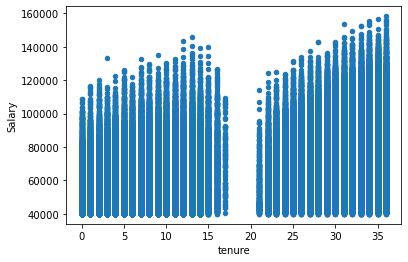

In [390]:
df.plot.scatter('tenure', 'Salary')

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [393]:
query = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""
titles = get_data_from_sql(user, host, password, "employees", query)

pandas.core.frame.DataFrame

In [394]:
titles

,emp_no,title_count,days_on_job
0,10001,1,12831
1,10002,1,13048
2,10003,1,12768
3,10004,2,12673
4,10005,2,11657
...,...,...,...
300019,499995,1,10439
300020,499996,2,11277
300021,499997,2,12897
300022,499998,2,10165


In [396]:
corr, p = stats.pearsonr(titles.days_on_job, titles.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.266598929913662, 0.0)

### Use the sleepstudy data. Is there a relationship between days and reaction time?

In [77]:
from pydataset import data
sleepdf = data("sleepstudy")
sleepdf

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [88]:
pt = pd.pivot_table(sleepdf, values=["Reaction"], index=sleepdf["Subject"], columns=sleepdf["Days"])
pt

Reaction                                                              \
Days            0         1         2         3         4         5         6   
Subject                                                                         
308      249.5600  258.7047  250.8006  321.4398  356.8519  414.6901  382.2038   
309      222.7339  205.2658  202.9778  204.7070  207.7161  215.9618  213.6303   
310      199.0539  194.3322  234.3200  232.8416  229.3074  220.4579  235.4208   
330      321.5426  300.4002  283.8565  285.1330  285.7973  297.5855  280.2396   
331      287.6079  285.0000  301.8206  320.1153  316.2773  293.3187  290.0750   
332      234.8606  242.8118  272.9613  309.7688  317.4629  309.9976  454.1619   
333      283.8424  289.5550  276.7693  299.8097  297.1710  338.1665  332.0265   
334      265.4731  276.2012  243.3647  254.6723  279.0244  284.1912  305.5248   
335      241.6083  273.9472  254.4907  270.8021  251.4519  254.6362  245.4523   
337      312.3666  313.8058  291.6112  346.1222  365.7324  391.8385  404.2601   
349      236.1032  230.3167  238.9256  254.9220  250.7103  269.7744  281.5648   
350      256.2968  243.4543  256.2046  255.5271  268.9165  329.7247  379.4445   
351      250.5265  300.0576  269.8939  280.5891  271.8274  304.6336  287.7466   
352      221.6771  298.1939  326.8785  346.8555  348.7402  352.8287  354.4266   
369      271.9235  268.4369  257.2424  277.6566  314.8222  317.2135  298.1353   
370      225.2640  234.5235  238.9008  240.4730  267.5373  344.1937  281.1481   
371      269.8804  272.4428  277.8989  281.7895  279.1705  284.5120  259.2658   
372      269.4117  273.4740  297.5968  310.6316  287.1726  329.6076  334.4818   

                                       
Days            7         8         9  
Subject                                
308      290.1486  430.5853  466.3535  
309      217.7272  224.2957  237.3142  
310      255.7511  261.0125  247.5153  
330      318.2613  305.3495  354.0487  
331      334.8177  293.7469  371.5811  
332      346.8311  330.3003  253.8644  
333      348.8399  333.3600  362.0428  
334      331.5229  335.7469  377.2990  
335      235.3110  235.7541  237.2466  
337      416.6923  455.8643  458.9167  
349      308.1020  336.2806  351.6451  
350      362.9184  394.4872  389.0527  
351      266.5955  321.5418  347.5655  
352      360.4326  375.6406  388.5417  
369      348.1229  340.2800  366.5131  
370      347.5855  365.1630  372.2288  
371      304.6306  350.7807  369.4692  
372      343.2199  369.1417  364.1236

In [94]:
pt.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of           Days
Reaction  0       256.651806
          1       264.495756
          2       265.361900
          3       282.992011
          4       288.649422
          5       308.518456
          6       312.178256
          7       318.750583
          8       336.629506
          9       350.851222
dtype: float64>

**Form the Hypotheses**

$H_{0}$: there is no linear relationship between days and reaction time (Independent).

$H_{a}$: there is a linear relationship between days and reaction time (Dependent).

In [397]:
corr, p = stats.pearsonr(sleepdf.Days, sleepdf.Reaction)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

In [398]:
alpha = .05
p < alpha

True

We must reject the $H_{0}$ which states that there is no linear relationship between days and reaction time.

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

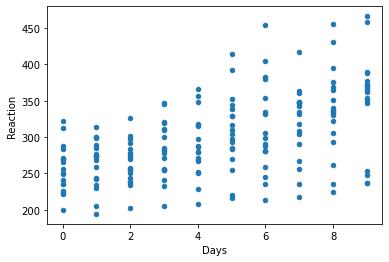

In [127]:
sleepdf.plot.scatter('Days', 'Reaction')

## Chi Square

### 1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [399]:
# Intitialise data of lists
exdata = [{'Codeup Student': 49, 'Not Codeup Student':20}, {'Codeup Student': 1, 'Not Codeup Student': 30}]
 
# Creates pandas DataFrame by passing
# Lists of dictionaries and row index.
observed = pd.DataFrame(exdata, index =['Uses Macbook', "Doesn't Use A Macbook"])
 
# Print the data
observed

,Codeup Student,Not Codeup Student
Uses Macbook,49,20
Doesn't Use A Macbook,1,30


#### Is using a macbook independent from being a codeup student?

Form the null and alternate hypothesis

- $H_0$: There is no association between using a macbook and being a codeup student (independence)
- $H_a$: There is an association between sing a macbook and being a codeup student (dependence)

There are only 2 categories in the codeup student status categories: "Yes" and "No.

In [400]:
# use stats.chi2_contingency test 

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [401]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degrees of freedom = ', degf)

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000
degrees of freedom =  1


Decide using p-value:

In [402]:
null_hypothesis = "Use of a macbook and being a codeup student are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")



We reject the hypothesis that Use of a macbook and being a codeup student are independent


### 2. Choose another 2 categorical variables from the mpg dataset and perform a *chi <sup>2</sup>* contingency table test with them. Be sure to state your null and alternative hypotheses.

In [185]:
from pydataset import data
df = data('mpg')
df["avg_mpg"] = ((df.cty + df.hwy) / 2)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [226]:
#df["manual"] = 
df["transmission"] = df["trans"].apply(lambda x: "manual" if x.startswith("manual") == True else "auto")
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,manual


**Question:**
    -Are number of manufacturer and transmission independent?
    
**State the hypotheses**

$H_0$: manufacturer and transmission have no association (They are independent)

$H_a$: manufacturer and transmission are associated (They are dependent)

In [260]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(df.transmission, df.manufacturer)
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
transmission,,,,,,,,,,,,,,,
auto,11,16,30,17,4,7,8,4,3,4,8,5,7,20,13
manual,7,3,7,8,5,7,0,0,0,0,5,0,7,14,14


In [261]:
# Set our alpha
alpha = 0.05

In [262]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [263]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'd.o.f.= {degf}')

Observed

[[11 16 30 17  4  7  8  4  3  4  8  5  7 20 13]
 [ 7  3  7  8  5  7  0  0  0  0  5  0  7 14 14]]
---
Expected

[[12 12 24 16  6  9  5  2  2  2  8  3  9 22 18]
 [ 5  6 12  8  2  4  2  1  0  1  4  1  4 11  8]]
---

chi^2 = 29.2937
p     = 0.0095
d.o.f.= 14


In [239]:
null_hypothesis = "manufacturer and transmission are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that manufacturer and transmission are independent


**Question:**
    -Are cylinders and transmission independent?
    
**State the hypotheses**

$H_0$: cylinders and transmission have no association (They are independent)

$H_a$: cylinders and transmission are associated (They are dependent)

In [254]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(df.cyl, df.transmission)
observed

transmission,auto,manual
cyl,,
4,41,40
5,2,2
6,56,23
8,58,12


In [255]:
# Set our alpha
alpha = 0.05

In [256]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [257]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'd.o.f.= {degf}')

Observed

[[41 40]
 [ 2  2]
 [56 23]
 [58 12]]
---
Expected

[[54 26]
 [ 2  1]
 [53 25]
 [46 23]]
---

chi^2 = 18.8823
p     = 0.0003
d.o.f.= 3


In [258]:
null_hypothesis = "cylinders and transmission are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis that cylinders and transmission are independent


### Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [404]:
query = '''
SELECT emp_no, dept_no, employees.gender as gender, departments.dept_name as dept_name
FROM dept_emp
LEFT JOIN employees.employees
USING (emp_no)
JOIN employees.departments
USING (dept_no)
WHERE dept_emp.to_date > NOW()
    AND dept_name = 'Marketing'
	OR dept_name = 'Sales';
'''
df = get_data_from_sql(user, host, password, "employees", query)
df

,emp_no,dept_no,gender,dept_name
0,10017,d001,F,Marketing
1,10058,d001,M,Marketing
2,10140,d001,F,Marketing
3,10228,d001,F,Marketing
4,10239,d001,F,Marketing
...,...,...,...,...
67082,499976,d007,M,Sales
67083,499980,d007,M,Sales
67084,499986,d007,F,Sales
67085,499987,d007,F,Sales


**State the hypotheses**

$H_0$: employee gender and outcome of working in sales or marketing have no association (They are independent)

$H_a$: employee gender and outcome of working in sales or marketing are associated (They are dependent)

In [405]:
# pandas crosstab to make a 'contingency' table
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,20854
M,8978,31391


In [406]:
# Set our alpha
alpha = 0.05

In [407]:
# chi2_contingency returns 4 different values

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [408]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'd.o.f.= {degf}')

Observed

[[ 5864 20854]
 [ 8978 31391]]
---
Expected

[[ 5910 20807]
 [ 8931 31437]]
---

chi^2 = 0.7793
p     = 0.3774
d.o.f.= 1


Decide using p-value:

In [409]:
null_hypothesis = "employee gender and outcome of working in sales or marketing are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis that employee gender and outcome of working in sales or marketing are independent


- Is an employee's gender independent of whether or not they are or have been a manager?

In [420]:
query = '''
SELECT gender, dept_manager.dept_no
FROM employees
LEFT JOIN employees.dept_manager
USING (emp_no);
'''
df = get_data_from_sql(user, host, password, "employees", query)
df

,gender,dept_no
0,M,None
1,F,None
2,M,None
3,M,None
4,M,None
...,...,...
300019,F,None
300020,M,None
300021,M,None
300022,M,None


In [423]:
# Since pearsons test does not accept columns with NaN or infs, we fill non-managerial department numbers with 0
df.fillna(0, inplace=True)

In [424]:
df

,gender,dept_no
0,M,0
1,F,0
2,M,0
3,M,0
4,M,0
...,...,...
300019,F,0
300020,M,0
300021,M,0
300022,M,0


In [431]:
df.dept_no.value_counts()

0       300000
d006         4
d009         4
d004         4
d008         2
d001         2
d007         2
d002         2
d003         2
d005         2
Name: dept_no, dtype: int64

In [432]:
# new column returns 0 if employee isnt a manager and 1 if they are

df['manager_status'] = df.dept_no.apply(lambda x: x if x==0 else 1)

In [433]:
df

,gender,dept_no,manager_status
0,M,0,0
1,F,0,0
2,M,0,0
3,M,0,0
4,M,0,0
...,...,...,...
300019,F,0,0
300020,M,0,0
300021,M,0,0
300022,M,0,0


In [434]:
df.manager_status.value_counts()

0    300000
1        24
Name: manager_status, dtype: int64

In [435]:
observed = pd.crosstab(df.gender, df.manager_status)

In [436]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [438]:
print('Observed:\n')
print(observed)
print('~~~~~~~~~~~~~~~~~~~~~~')
print('Expected: \n')
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))
print('~~~~~~~~~~~~~~~~~~~~~~')
print(f'chi^2 value: {chi2:.4f}')
print(f'p value: {p:.8f}')
if p < alpha:
    print('''Our p value is less than our alpha and we can reject the null hypothesis
         We can suggest gender of employee is not independent of history as a manager''')
else:
    print('We cannot reject the null hypothesis')

Observed:

manager_status       0   1
gender                    
F               120038  13
M               179962  11
~~~~~~~~~~~~~~~~~~~~~~
Expected: 

manager_status              0          1
gender                                  
F               120041.396688   9.603312
M               179958.603312  14.396688
~~~~~~~~~~~~~~~~~~~~~~
chi^2 value: 1.4567
p value: 0.22745819
We cannot reject the null hypothesis
